In [1]:
!pip install pycaret[full]

In [2]:
from google.colab import files
uploaded = files.upload()


Saving diabetes.csv to diabetes.csv


In [3]:
import pandas as pd

df = pd.read_csv('diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
from pycaret.classification import *
s = setup(data=df, target='Outcome', session_id=123, train_size=0.8)

,Description,Value
0,Session id,123
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(614, 9)"
6,Transformed test set shape,"(154, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [5]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7717,0.8234,0.5565,0.7437,0.6289,0.4697,0.4853,0.0270
lr,Logistic Regression,0.7701,0.8214,0.5565,0.7371,0.6266,0.4661,0.4809,0.7990
lda,Linear Discriminant Analysis,0.7668,0.8233,0.5565,0.7298,0.6240,0.4602,0.4743,0.0440
gbc,Gradient Boosting Classifier,0.7589,0.8229,0.5939,0.6815,0.6290,0.4533,0.4595,0.2210
nb,Naive Bayes,0.7573,0.8118,0.6045,0.6822,0.6298,0.4527,0.4623,0.0270
rf,Random Forest Classifier,0.7556,0.8117,0.5658,0.6944,0.6181,0.4417,0.4506,0.2330
ada,Ada Boost Classifier,0.7522,0.8210,0.5608,0.6897,0.6114,0.4340,0.4435,0.1230
catboost,CatBoost Classifier,0.7507,0.8243,0.5753,0.6748,0.6145,0.4334,0.4411,2.6780
qda,Quadratic Discriminant Analysis,0.7410,0.8030,0.5671,0.6594,0.6009,0.4130,0.4212,0.0280
et,Extra Trees Classifier,0.7410,0.8031,0.5006,0.6842,0.5726,0.3941,0.4073,0.2020


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

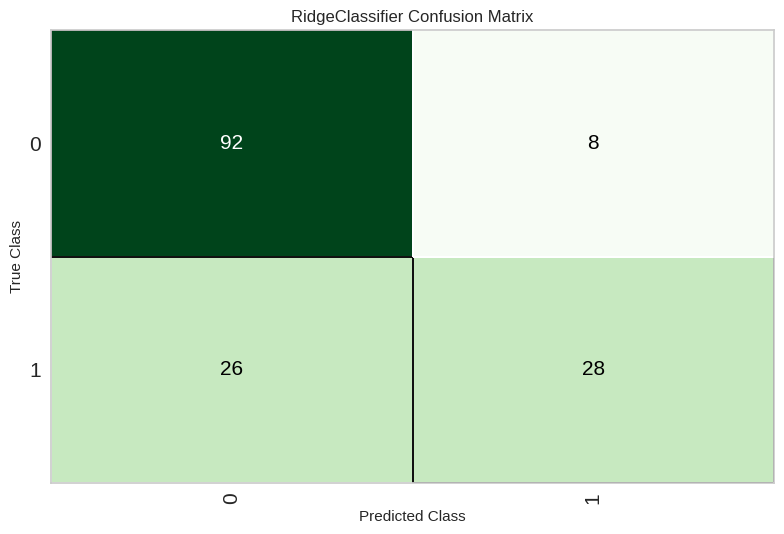

In [10]:
plot_model(best, plot='confusion_matrix')

In [11]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [12]:
setup(data=df, target='Outcome', fix_imbalance=True)


,Description,Value
0,Session id,459
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(931, 9)"
5,Transformed train set shape,"(700, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [13]:
import numpy as np

cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_to_fix:
    df[col].replace(0, np.nan, inplace=True)
    df[col].fillna(df[col].median(), inplace=True)


In [16]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [18]:
Diabetes_model = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.8139,0.7658,0.6049,0.8167,0.6950,0.5653,0.5785


In [19]:
save_model(best, 'Diabetes_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Pregnancies', 'Glucose',
                                              'BloodPressure', 'SkinThickness',
                                              'Insulin', 'BMI',
                                              'DiabetesPedigreeFunction',
                                              'Age'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 (...
          

In [20]:
from google.colab import files
files.uplo('Diabetes_model.pkl')  # or use .pkl.pkl if that's what got saved


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>